# Movie Review Sentiment

### Project Objective:
The goal of this project is to classify movie reviews as either positive or negative by analyzing the sentiment of the text. We'll use two primary methods for sentiment analysis:

1. Custom Models: Naive Bayes models using Bag of Words (BoW) and TF-IDF techniques.

2. Pre-trained Model: VADER sentiment analysis model.

We'll evaluate the performance of these models and determine which one performs better in predicting the sentiment of reviews.


In [2]:
###Method 1
#Load our data

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
##Load up train.csv as train
train = pd.read_csv("train.csv")

In [5]:
train.head()

,text,sentiment
0,"Now, I won't deny that when I purchased this o...",neg
1,"The saddest thing about this ""tribute"" is that...",neg
2,Last night I decided to watch the prequel or s...,neg
3,I have to admit that i liked the first half of...,neg
4,I was not impressed about this film especially...,neg


In [6]:
train["sentiment"]

0        neg
1        neg
2        neg
3        neg
4        neg
        ... 
24995    pos
24996    pos
24997    neg
24998    neg
24999    neg
Name: sentiment, Length: 25000, dtype: object

In [7]:
#Total no of rows
len(train)

25000

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

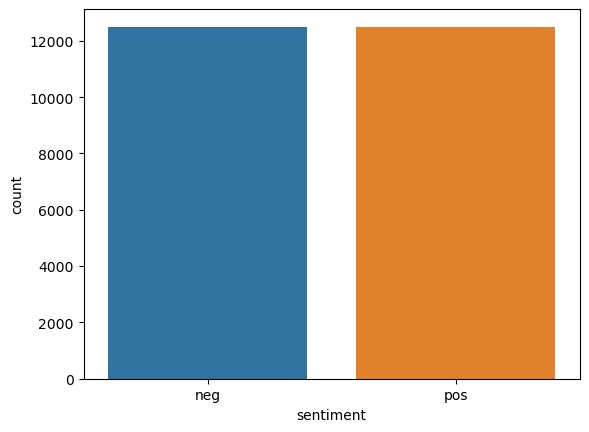

In [8]:
#plotting the number of pos and neg values in my data sets
sns.countplot(train["sentiment"])

In [67]:
!pip install wordcloud


     ------------------------------------ 300.6/300.6 kB 221.3 kB/s eta 0:00:00


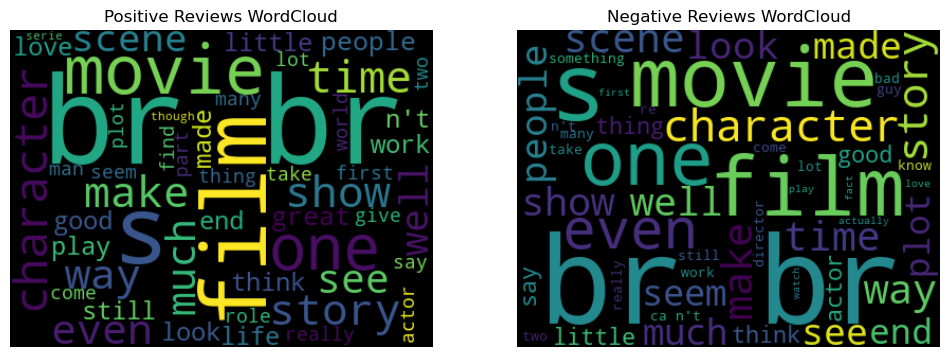

In [71]:
# First, import the necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'train' DataFrame is already defined and 'cleaned_text' is the column with the text data

# Create the word clouds for positive and negative reviews
positive_reviews = ' '.join(train[train['sentiment'] == 'pos']['cleaned_text'])
negative_reviews = ' '.join(train[train['sentiment'] == 'neg']['cleaned_text'])

plt.figure(figsize=(12,6))

# Positive reviews word cloud
plt.subplot(1, 2, 1)
wordcloud = WordCloud(width=400, height=300, max_words=50).generate(positive_reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Positive Reviews WordCloud')
plt.axis('off')


# Negative reviews word cloud
plt.subplot(1, 2, 2)
wordcloud = WordCloud(width=400, height=300, max_words=50).generate(negative_reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Negative Reviews WordCloud')
plt.axis('off')

plt.show()

In [9]:
example = train["text"].iloc[12]

In [10]:
example

"My kids picked this out at the video store...it's great to hear Liza as Dorothy cause she sounds just like her mom. But there are too many bad songs, and the animation is pretty crude compared to other cartoons of that time."

In [11]:
train["sentiment"].iloc[12]

'neg'

In [12]:
train["text"].iloc[7]

"I'm a sucker for a good romance, but this one doesn't qualify as either good or a romance. I had the plot nailed down before the credits were through. With such poor dialog, plot and character development, I suggest investing your hour and a half elsehere. I had to rush out and rent Serendipity for the third time so I could get the bad taste of this one out of my mouth."

In [13]:
###Clean our data
# !pip install nltk

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [15]:
# Download the necessary data 
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
stop_words = set(stopwords.words('english'))

In [17]:
#### creaiing a function that will remove stopwords

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return " ".join(filtered_text)

In [18]:
#!pip install tqdm

In [19]:
# Import the necessary libraries
from tqdm import tqdm
tqdm.pandas()


In [20]:
# Now, use tqdm's progress bar with pandas apply function
train['cleaned_text'] = train['text'].progress_apply(remove_stopwords)

100%|██████████████████████████████████████| 25000/25000 [01:21<00:00, 306.26it/s]


In [21]:
train['cleaned_text'].iloc[0]

", wo n't deny purchased eBay , high expectations . incredible out-of-print work master comedy enjoy . However , soon disappointed . Apologies enjoyed , found Compleat Al difficult watch . got smiles , sure , majority funny came music videos ( 've got DVD ) rest basically filler . could tell Al 's greatest video achievement ( honor goes UHF ) . Honestly , doubt ever make jump DVD , 're ultra-hardcore Al fan everything , buy tape eBay . n't pay much ."

### Feature Extraction
we will  use two techniques:

- Bag of Words (BoW): This converts text data into a matrix of token counts.

- TF-IDF (Term Frequency-Inverse Document Frequency): This weighs the importance of words in relation to the entire dataset.

In [22]:
### Lets create bag of words and tf-idf
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [23]:
# Initialize the CountVectorizer for Bag of Words
vectorizer_bow = CountVectorizer()

In [24]:
bow_matrix = vectorizer_bow.fit_transform(train['cleaned_text'])

In [25]:
vectorizer_tfidf = TfidfVectorizer()

In [26]:
tfidf_matrix = vectorizer_tfidf.fit_transform(train['cleaned_text'])

In [27]:
tfidf_matrix 

<25000x74833 sparse matrix of type '<class 'numpy.float64'>'
	with 2512799 stored elements in Compressed Sparse Row format>

#### Naive Bayes Classifier
We then train two Naive Bayes models, one using BoW features and the other using TF-IDF features, to classify the sentiment of the reviews.

In [28]:
### Creating Our Model
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report



In [29]:
### Naive bayes using Bag of words
X_train_bow,X_test_bow,y_train,y_test = train_test_split(bow_matrix,train['sentiment'], test_size = 0.1, random_state = 42)

### for tfidf
X_train_tfidf,X_test_tfidf,y_train,y_test = train_test_split(bow_matrix,train['sentiment'], test_size = 0.1, random_state = 42)


In [30]:
###Training model with BOW
nb_bow = MultinomialNB()

nb_bow.fit(X_train_bow, y_train)

MultinomialNB()

In [31]:

###Training model with tf-idf
nb_tfidf = MultinomialNB()

nb_tfidf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [32]:
y_pred_bow = nb_bow.predict(X_test_bow)

In [33]:
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

### Evaluating Naive Bayes Models

In [34]:
accuracy_bow = accuracy_score(y_test,y_pred_bow)
print('accuracy BOW')
print(accuracy_bow)

print (classification_report(y_test,y_pred_bow))

accuracy BOW
0.8644
              precision    recall  f1-score   support

         neg       0.85      0.89      0.87      1266
         pos       0.88      0.84      0.86      1234

    accuracy                           0.86      2500
   macro avg       0.87      0.86      0.86      2500
weighted avg       0.87      0.86      0.86      2500



In [35]:
accuracy_tfidf = accuracy_score(y_test,y_pred_tfidf)
print('accuracy tfidf')
print(accuracy_tfidf)

print (classification_report(y_test,y_pred_tfidf))

accuracy tfidf
0.8644
              precision    recall  f1-score   support

         neg       0.85      0.89      0.87      1266
         pos       0.88      0.84      0.86      1234

    accuracy                           0.86      2500
   macro avg       0.87      0.86      0.86      2500
weighted avg       0.87      0.86      0.86      2500



### VADER Sentiment Analysis (Pre-trained Model)
For the second method, we utilize the pre-trained VADER (Valence Aware Dictionary and sEntiment Reasoner) model, which is specifically designed for sentiment analysis of social media and reviews. It classifies text into positive, negative, and neutral sentiments.

In [36]:
###for second method
text = 'vader is a bad tool for sentiment analysis'

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [37]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [38]:
analyzer = SentimentIntensityAnalyzer()

In [39]:
analyzer.polarity_scores(text)

{'neg': 0.368, 'neu': 0.632, 'pos': 0.0, 'compound': -0.5423}

In [40]:
def generate_sentiment(text):
    scores = analyzer.polarity_scores(text)
    if scores['compound'] > 0:
        return "pos"
    else:
        return "neg"

In [41]:
train['predictions'] = train['text'].progress_apply(generate_sentiment)

100%|██████████████████████████████████████| 25000/25000 [02:08<00:00, 194.74it/s]


In [42]:
accuracy_vader = accuracy_score(train['sentiment'],train['predictions'])
print('accuracy vader')
print(accuracy_vader)

print (classification_report(train['sentiment'],train['predictions']))

accuracy vader
0.69428
              precision    recall  f1-score   support

         neg       0.78      0.54      0.64     12500
         pos       0.65      0.85      0.74     12500

    accuracy                           0.69     25000
   macro avg       0.72      0.69      0.69     25000
weighted avg       0.72      0.69      0.69     25000



In [43]:
## Vader ==> Social Media twees
## check ou any other general purpose alternative to vader

In [44]:
### Load in Test File and see How we would process using all 3 models 

In [46]:
#Load in CSV
#apply the function

#Load in your csv
# Load this tet
#Create tfdif and bow
## Apply the models to both features

In [50]:
test = pd.read_csv("test.csv")

In [54]:
test['vader'] = test['text'].progress_apply(generate_sentiment)

100%|██████████████████████████████████████| 25000/25000 [01:47<00:00, 233.48it/s]


In [56]:
test['cleaned'] = test['text'].progress_apply(remove_stopwords)

100%|██████████████████████████████████████| 25000/25000 [01:15<00:00, 332.98it/s]


In [57]:
#### Create bag of Words
bow_test = vectorizer_bow.transform(test['cleaned'])

###Create TFIDF

tfidf_test = vectorizer_tfidf.transform(test['cleaned'])

In [58]:
test['bow'] = nb_tfidf.predict(tfidf_test)

test['tfidf'] = nb_tfidf.predict(tfidf_test)

In [59]:
test

,text,sentiment,vader,cleaned,bow,tfidf
0,"My daughter liked it but I was aghast, that a ...",neg,pos,"daughter liked aghast , character movie smokes...",neg,neg
1,I... No words. No words can describe this. I w...,neg,neg,... words . words describe . try sake brave pe...,neg,neg
2,this film is basically a poor take on the old ...,neg,neg,film basically poor take old urban legend baby...,neg,neg
3,"This is a terrible movie, and I'm not even sur...",neg,pos,"terrible movie , 'm even sure 's terrible . 's...",neg,neg
4,First of all this movie is a piece of reality ...,pos,pos,First movie piece reality well realized artist...,pos,pos
...,...,...,...,...,...,...
24995,"For one thing, he produced this movie. It has ...",neg,pos,"one thing , produced movie . feel later movies...",pos,pos
24996,The title comes from an alteration an adolesce...,pos,pos,title comes alteration adolescent inmate corre...,pos,pos
24997,Christopher Nolan's first film is a 'no budget...,pos,neg,Christopher Nolan 's first film 'no budget ' b...,pos,pos
24998,The story is shortly about the faith-lacking b...,neg,neg,story shortly faith-lacking business man pries...,neg,neg


In [61]:
#Score my model
accuracy_vader = accuracy_score(test['sentiment'],test['vader'])
print('accuracy vader')
print(accuracy_vader)

print (classification_report(test['sentiment'],test['vader']))

accuracy vader
0.69836
              precision    recall  f1-score   support

         neg       0.79      0.54      0.64     12500
         pos       0.65      0.86      0.74     12500

    accuracy                           0.70     25000
   macro avg       0.72      0.70      0.69     25000
weighted avg       0.72      0.70      0.69     25000



In [63]:
#Score my model
accuracy_bow = accuracy_score(test['sentiment'],test['bow'])
print('accuracy BOW')
print(accuracy_bow)

print (classification_report(test['sentiment'],test['bow']))

accuracy BOW
0.81056
              precision    recall  f1-score   support

         neg       0.80      0.84      0.82     12500
         pos       0.83      0.79      0.81     12500

    accuracy                           0.81     25000
   macro avg       0.81      0.81      0.81     25000
weighted avg       0.81      0.81      0.81     25000



In [64]:
#Score my model
accuracy_tfidf = accuracy_score(test['sentiment'],test['tfidf'])
print('accuracy TF-IDF')
print(accuracy_tfidf)

print (classification_report(test['sentiment'],test['tfidf']))

accuracy TF-IDF
0.81056
              precision    recall  f1-score   support

         neg       0.80      0.84      0.82     12500
         pos       0.83      0.79      0.81     12500

    accuracy                           0.81     25000
   macro avg       0.81      0.81      0.81     25000
weighted avg       0.81      0.81      0.81     25000



# Conclusion

Both the Bag of Words (BoW) and TF-IDF models performed equally well, achieving an accuracy of 81.06% with high precision, recall, and F1-scores for both positive and negative classes. These models are better than the VADER model, which achieved an accuracy of 69.84%. While VADER has good recall for positive reviews (0.86), it struggles with recall for negative reviews (0.54), resulting in lower overall performance.

Thus, the BoW and TF-IDF Naive Bayes models outperform VADER for this sentiment analysis task, making them better suited for classifying movie reviews in this dataset.